# Importing and Cleaning Data

In [2]:
# Importing libraries to analyse the dataset.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing dataset

ab_nyc_data = pd.read_csv("Oasis_InfoByte/CSV_FILES/AB_NYC_2019.csv")
ab_nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Getting familirized with data
# Examining the dimensions of data

print(f'The dimension of airbnb dataset is {ab_nyc_data.shape}')

The dimension of airbnb dataset is (48895, 16)


In [5]:
# Reviewing the feature names

print(f'Feature names present in the dataset are : ')
list(ab_nyc_data.columns)

Feature names present in the dataset are : 


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
# check for categorical columns

cols = ab_nyc_data.select_dtypes(include = 'object').columns
print(f'Following are the categorical features in the dataset :\n{list(cols)}')

Following are the categorical features in the dataset :
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [7]:
# First 5 rows of the data
ab_nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Last 5 rows of the data
ab_nyc_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [9]:
# Information checks
ab_nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
# Check null values
print(f'Before data cleaning, the missing values are : ')
ab_nyc_data.isnull().sum()

Before data cleaning, the missing values are : 


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Fill in the missing values

ab_nyc_data['name'].fillna('Absentee', inplace = True)
ab_nyc_data['host_name'].fillna('Absentee', inplace = True)

In [12]:
# Drop unnecessary columns.
ab_nyc_data_new = ab_nyc_data.drop(['last_review', 'reviews_per_month'], axis = 1)
ab_nyc_data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [13]:
# Check on null values in new dataset
print(f'Number of missing values after cleaning the data are:')
ab_nyc_data_new.isnull().sum()

Number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## What insights can we gather regarding various hosts and regions?

In [14]:
# Let's find out which hosts have the highest number of listings and in which neighborhoods they are located.

host_areas = ab_nyc_data_new.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
Foremost_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
Foremost_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
7483,Kazuya,Manhattan,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96


### VISUALIZATION

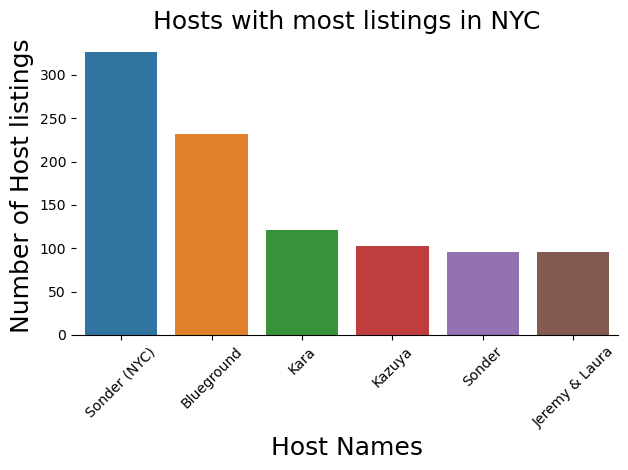

In [15]:
# Visualize the hosts with most listings.

# Extract data from Foremost_hosts DataFrame 
host_name = Foremost_hosts['host_name']
calculated_host_listings_count = Foremost_hosts['calculated_host_listings_count']

# Create a bar chart using Seaborn
sns.barplot(x = host_name, y = calculated_host_listings_count)

# Customize the chart
sns.despine(left = True)  #Remove left spine for cleaner look
plt.title('Hosts with most listings in NYC', fontsize = 18)
plt.xlabel('Host Names', fontsize = 18)
plt.ylabel('Number of Host listings', fontsize = 18)
plt.xticks(rotation = 45)  #Rotate x-axis labels if they overlap
plt.tight_layout()  #Adjust spacing to prevent overlapping elements

plt.show()

In [16]:
# Number of Airbnb listed in each Neighbourhood.

data = ab_nyc_data_new.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


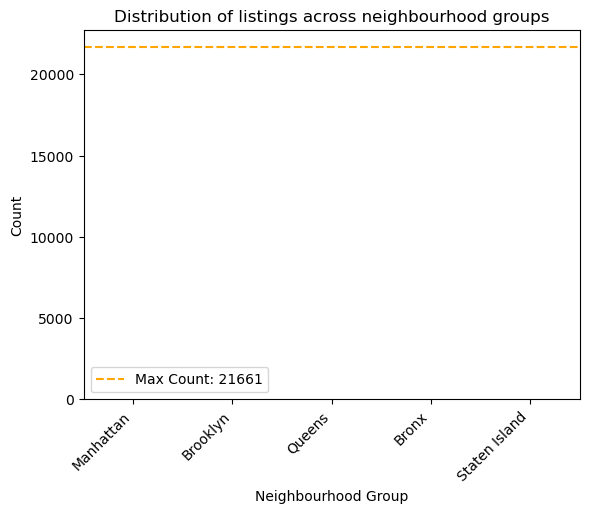

In [17]:
# Visualize the number of listings in each neighbourhood through bar plot.

# Assuming data is a DataFrame
sns.countplot(x = 'neighbourhood_group', data = data)  #Create count plot

# Customize the chart
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of listings across neighbourhood groups')
plt.xticks(rotation = 45, ha = 'right')   # Rotate x-axis labels for readability

# Add a horizontal line at the maximum count 
max_count = data['count'].max()
plt.axhline(y = max_count, color = 'orange', linestyle = '--', label = f'Max Count: {max_count}')

plt.legend()
plt.show()

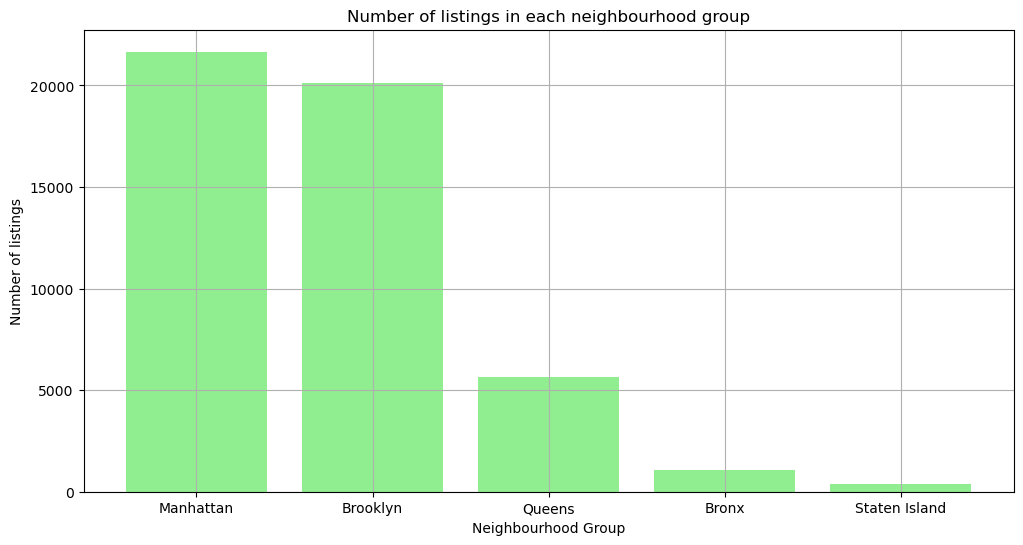

In [18]:
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with columns 'neighbourhood_group' and 'count'
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(data['neighbourhood_group'], data['count'])  # Create the bar chart

# Customize labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of listings')
plt.title('Number of listings in each neighbourhood group')

# Optional customizations (gridlines, color, etc.)
plt.grid(True)  # Add gridlines for better readability
plt.bar(data['neighbourhood_group'], data['count'], color='lightgreen')  # Set bar color

# Display the chart
plt.show()

## What kind of information can predictions reveal?

In [19]:
# Identify which neighbourhood received maximum number of reviews.

area_reviews = ab_nyc_data_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
area_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


## VISUALIZATION

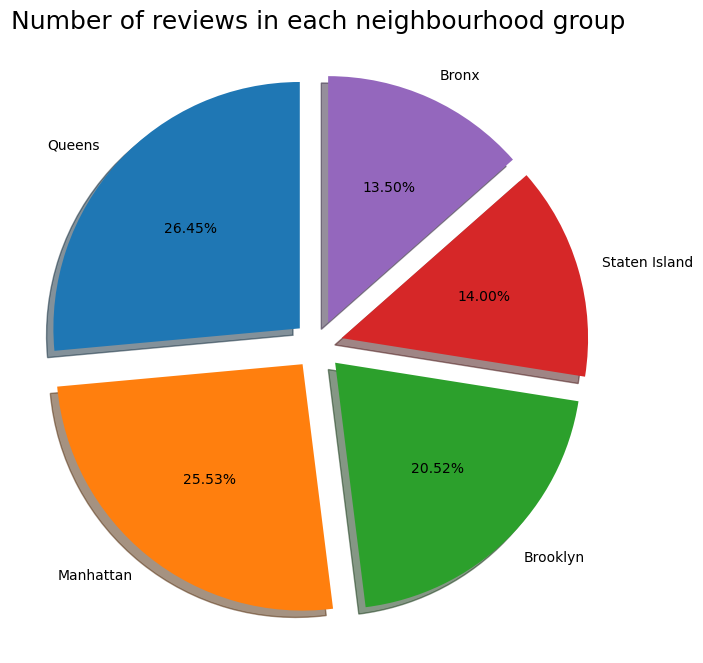

In [20]:
# Visualising number of reviews in each neighbourhood group through pie chart.

plt.figure(figsize = (13, 8))
reviews = area_reviews['number_of_reviews']
neighbourhood_groups = area_reviews['neighbourhood_group']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(reviews, labels = neighbourhood_groups, autopct = '%0.2f%%', startangle = 90, explode = explode, shadow = True)
plt.title('Number of reviews in each neighbourhood group', fontsize = 18)

plt.show()

In [21]:
# Descriptive statistics check
ab_nyc_data_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In the above table, min price is zero and max price is 10,000. Something is wrong with the data, and so need to check for the outliers.

In [22]:
ab_nyc_data_new.agg({'price':['mean', 'median', 'max', 'count']})

,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


The data appears skewed to the right because the mean is significantly higher than the median. (for positive skew)

To visualize the quartiles (spread) and potential outliers in price data, let's create a boxplot.

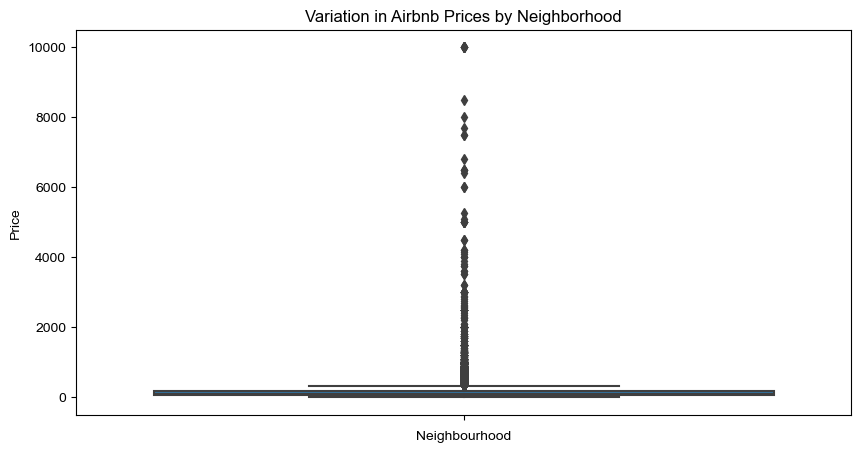

In [23]:
# Unveiling the price distribution through a boxplot

plt.figure(figsize=(10,5))
ax = sns.boxplot(y = 'price', data = ab_nyc_data_new).set_title('Variation in Airbnb Prices by Neighborhood')
sns.set_theme(style = 'dark')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

As anticipated, outliers are evident in the dataset. To address this issue, we will implement quantile-based flooring and capping. Initially, let's retrieve and display the 10th and 90th percentiles of the price column.

In [24]:
# Low quantile

q_low = ab_nyc_data_new['price'].quantile(0.10)
q_low

49.0

In [25]:
# High quantile

q_high = ab_nyc_data_new['price'].quantile(0.9)
q_high

269.0

We checked the Airbnb prices, and it looks like 10% of places are under $49 per night, and 90% are under $269. It's normal for some Airbnbs, like fancy apartments or mansions, to be much more expensive than others.

In [26]:
# Removing the values below 10th percentile and above 90th percentile.

ab_nyc_data_new = ab_nyc_data_new.drop(ab_nyc_data_new[ab_nyc_data_new['price']<q_low].index)
ab_nyc_data_new = ab_nyc_data_new.drop(ab_nyc_data_new[ab_nyc_data_new['price']>q_high].index)

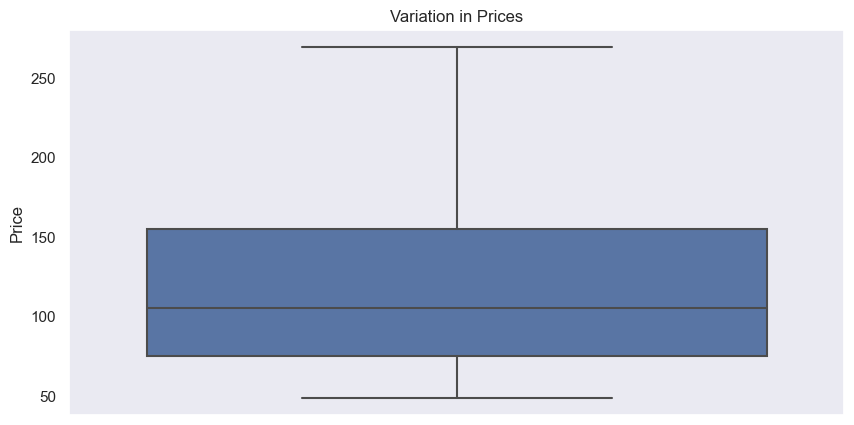

In [27]:
# Creating new boxplot.

plt.figure(figsize=(10, 5))
ax = sns.boxplot(y='price', data = ab_nyc_data_new).set_title('Variation in Prices')
sns.set_theme(style = 'white')
plt.ylabel('Price')
plt.show()

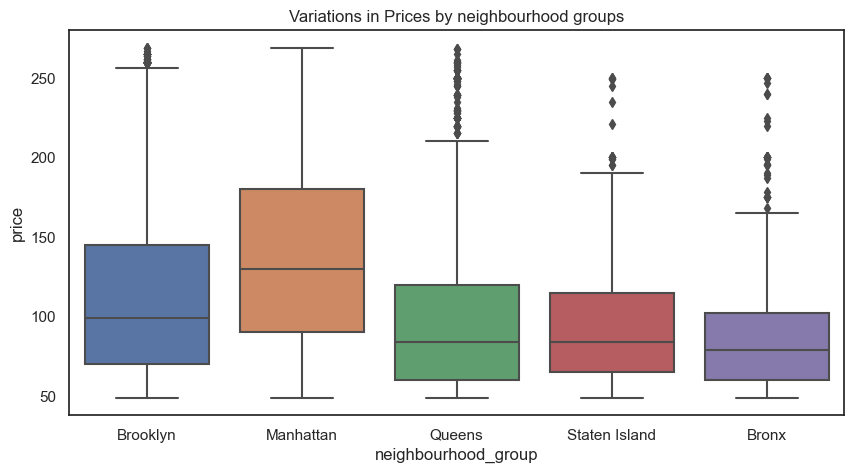

In [28]:
# Let's check the price distribution by neighbourhood groups.

plt.figure(figsize=(10, 5))
ax = sns.boxplot(x = 'neighbourhood_group', y = 'price', data = ab_nyc_data_new).set_title('Variations in Prices by neighbourhood groups')
plt.show()

Who Are the Most Booked Airbnb Hosts and Why?

In [29]:
# The most active hosts are likely those with the highest number of reviews, indicating frequent bookings at their accommodations.

busiest_hosts = ab_nyc_data_new.groupby(['host_name', 'host_id', 'room_type', 'neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by = 'number_of_reviews', ascending = False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
14729,Jj,4734398,Private room,Manhattan,607
5194,Carol,2369681,Private room,Manhattan,540
3280,Asa,12949460,Entire home/apt,Brooklyn,488
31453,Wanda,792159,Private room,Brooklyn,480
18686,Linda,2680820,Private room,Queens,474
7176,Dani,42273,Entire home/apt,Brooklyn,467
2434,Angela,23591164,Private room,Queens,466
465,Agnes,277379,Private room,Manhattan,458
14973,John,2267153,Private room,Manhattan,451
8210,Dennis & Naoko,307962,Entire home/apt,Queens,441


<BarContainer object of 10 artists>

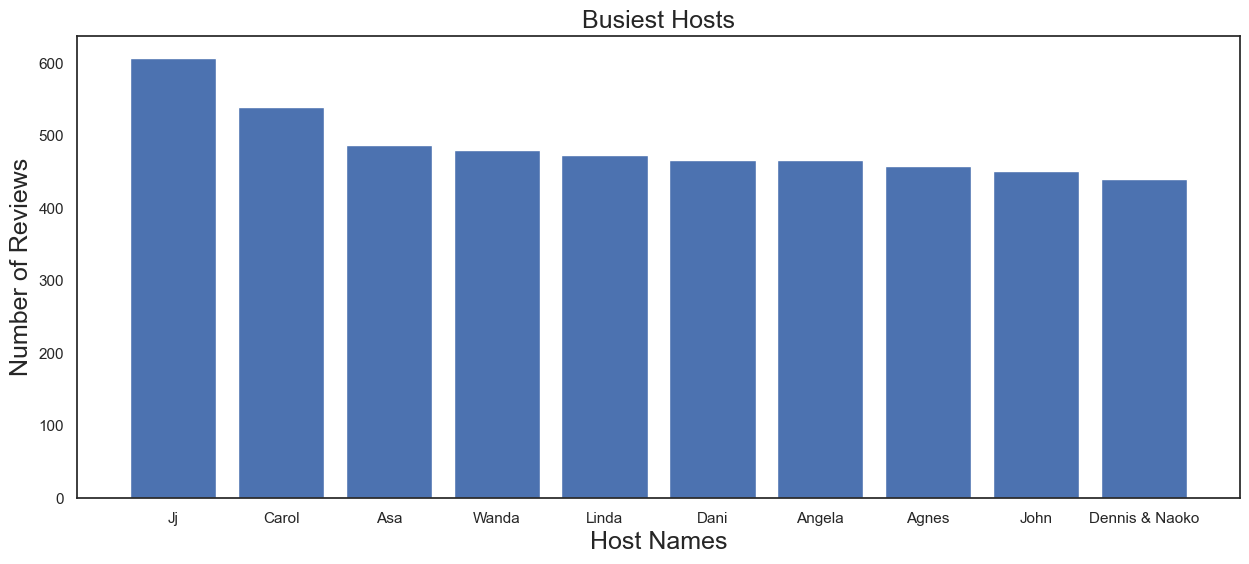

In [30]:
# Visualization of the busiest hosts data through bar plot.

plt.figure(figsize = (15, 6))
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names', {'fontsize':18})
plt.ylabel('Number of Reviews', {'fontsize':18})
plt.bar(host_name, reviews)

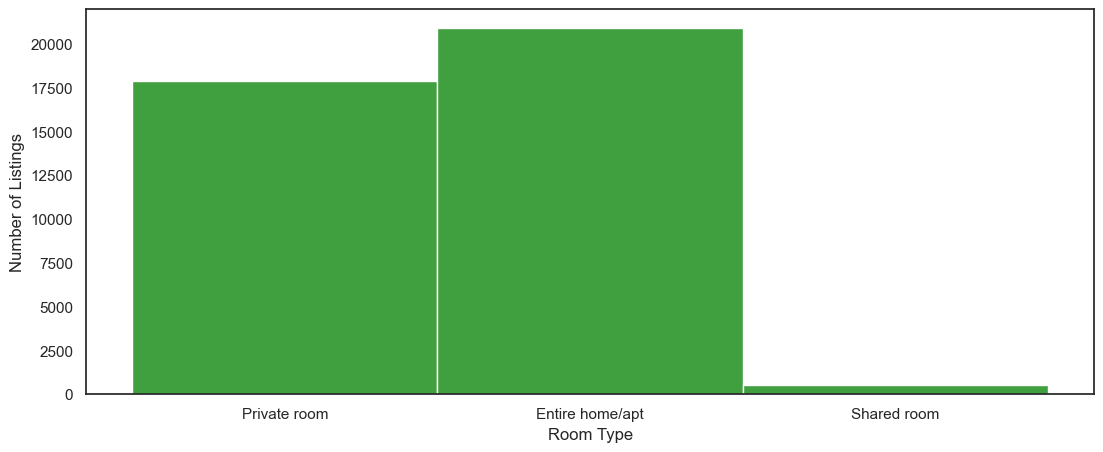

In [31]:
# Creating a histogram for room types to identify the most preferred types of rooms.

plt.rcParams['figure.figsize'] = (13, 5)
hp = sns.histplot(ab_nyc_data_new['room_type'], color = 'green')
hp.set_xlabel('Room Type')
hp.set_ylabel('Number of Listings')
plt.show()

Top 5 Busiest Hosts are:
 Ji,
 Carol,
 Asa,
 Wanda,
 Linda.

The hosts mentioned above are considered the busiest because they accommodate guests in Entire home/apt and private room types, which are the most preferred according to the histogram plot displayed earlier.

Distribution of Room Types Across Popular Neighborhoods.

In [32]:
# Top 10 neighbourhoods with most listings.

df2 = ab_nyc_data_new.groupby(['neighbourhood'])['id'].count().nlargest(10)
df2

neighbourhood
Williamsburg          3415
Bedford-Stuyvesant    2963
Harlem                2311
Bushwick              1846
Upper West Side       1619
East Village          1590
Hell's Kitchen        1576
Upper East Side       1561
Crown Heights         1257
Midtown               1002
Name: id, dtype: int64

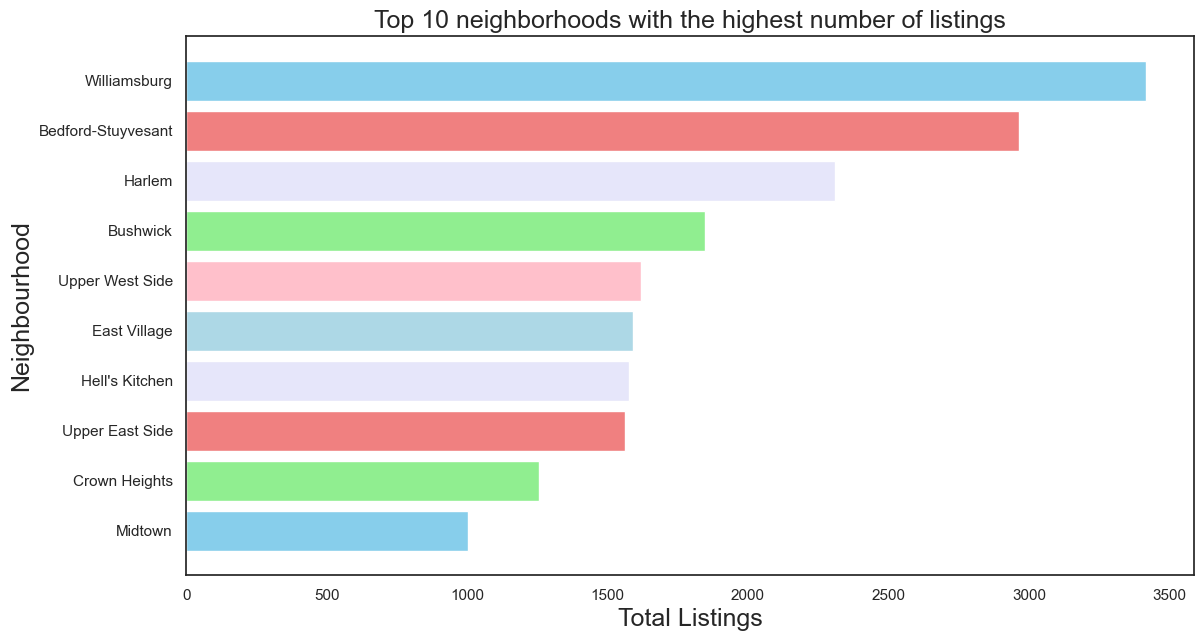

In [33]:
# Visualization of top 10 neighbourhood listings through bar plot.

plt.figure(figsize = (13, 7))
x = list(df2.index)
y = list(df2.values)
x.reverse()
y.reverse()

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lavender', 'lightblue', 'pink', 'lightgreen', 'lavender', 'lightcoral', 'skyblue']
plt.title('Top 10 neighborhoods with the highest number of listings', {'fontsize' : 18})
plt.ylabel('Neighbourhood', {'fontsize' : 18})
plt.xlabel('Total Listings', {'fontsize' : 18})
plt.barh(x, y, color = colors)
plt.show()

In [34]:
ab_nyc_data_new.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
255,Manhattan,Harlem,Private room,607
270,Manhattan,Lower East Side,Private room,540
196,Brooklyn,Park Slope,Entire home/apt,488
132,Brooklyn,Bushwick,Private room,480
358,Queens,Flushing,Private room,474
212,Brooklyn,South Slope,Entire home/apt,467
348,Queens,East Elmhurst,Private room,466
241,Manhattan,East Village,Private room,451
318,Queens,Astoria,Entire home/apt,441
419,Queens,Springfield Gardens,Entire home/apt,434


### The most popular neighborhood is Harlem, located in Manhattan, with the preferred room type being Private Room.

Key Findings:

Manhattan boasts the highest number of listings, followed by Brooklyn and Queens. Staten Island has the lowest number of listings.
Manhattan and Brooklyn collectively account for 87% of the listings available in NYC.
Brooklyn and Manhattan are the most favored neighborhood groups among visitors.
Queens has significantly fewer host listings compared to Manhattan. Thus, initiatives should be taken to encourage more host listings in Queens.
Private rooms and entire home/apartments are in highest demand, indicating a preference for more affordable rental options.

## Conclusion

Based on the analysis, it's evident that Manhattan stands out as the top neighborhood group with the highest number of listings and rental prices. This is largely due to Manhattan's renowned attractions such as museums, shops, parks, and theaters, coupled with its consistent influx of tourists throughout the year, resulting in elevated prices within the borough.

Following Manhattan, Brooklyn emerges as the second-ranked neighborhood group, offering a significant number of listings at comparatively more affordable prices than Manhattan.

In contrast, Queens, Bronx, and Staten Island exhibit fewer listing options, particularly notable in Staten Island. These areas, primarily residential, may appeal to guests seeking budget-friendly options or visiting family and friends residing there.

For more comprehensive data exploration, additional features such as positive and negative reviews would be valuable. This would provide insights into the overall popularity and satisfaction levels of each neighborhood.